In [1]:
import pandas as pd

## Question I:[40] Revisiting HW4 Bank Classification with New Tools (for dataset A)

### 1. Load a simple dataset and perform some basic data preprocessing to fill out ”unknowns”, outliers or other invalid data. Explain what preprocessing was performed and why. Also, change categorical data into numerical features using pandas.get dummies [5].

In [3]:
bank_data = pd.read_csv('bank-additional.csv', sep = ';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
bank_data.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119,4119,...,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1012,2509,1264,3315,2175,3349,2652,1378,860,...,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [127]:
for col in ['default', 'housing', 'loan', 'poutcome']:
    print(col)
    print('****************')
    print(bank_data[col].value_counts(),'\n')

default
****************
no         3315
unknown     803
yes           1
Name: default, dtype: int64 

housing
****************
yes        2175
no         1839
unknown     105
Name: housing, dtype: int64 

loan
****************
no         3349
yes         665
unknown     105
Name: loan, dtype: int64 

poutcome
****************
nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64 



In [19]:
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
num_columns = ['age', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
cal_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']

In [30]:
bank_data.shape

(4119, 21)

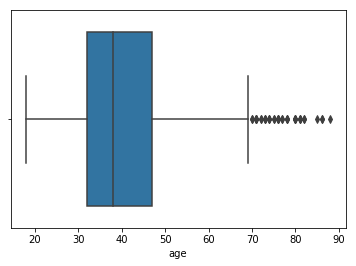

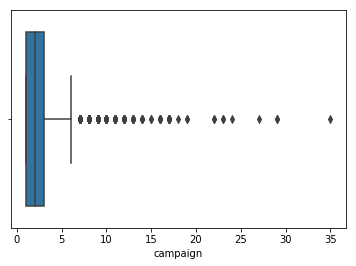

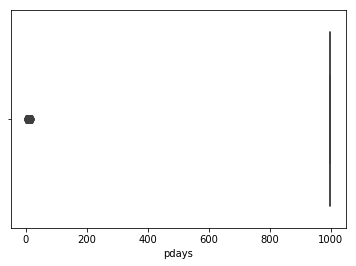

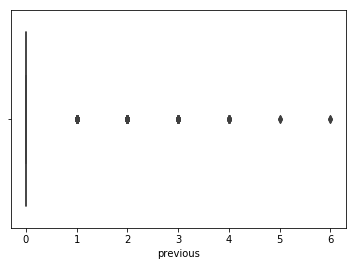

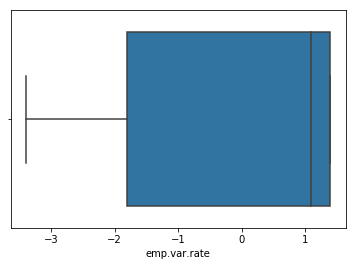

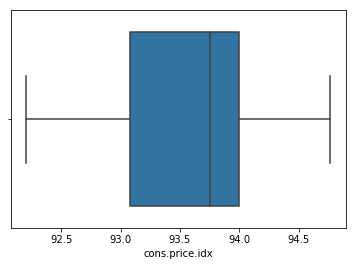

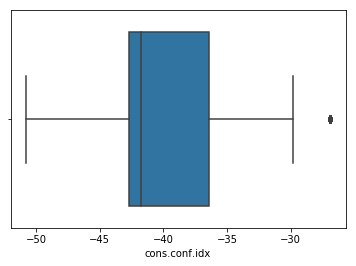

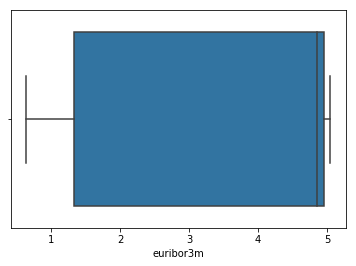

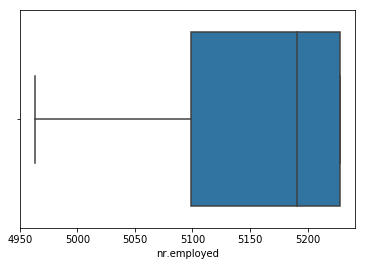

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
for i, col in enumerate(num_columns):
    plt.figure(i)
    sns.boxplot(x=bank_data[col])

### By looking at the above box plots, it is evident that the variables have few out liers. Lets detect and treat the out liers using Z- score method.

### The intuition behind the Z-score method of outlier detection is that, once we’ve centred and rescaled the data, anything that is too far from zero (the threshold is usually a Z-score of 3 or -3) should be considered an outlier. The detected outliers are replaced with respective upper and lower bound z-score corresponding values. If Z-score is greater than 3, we replace it with corresponding value for z-score 3.  If Z-score is less than -3, we replace it with corresponding value for z-score -3.

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(bank_data[num_columns])
z_df = pd.DataFrame(scaler.transform(bank_data[num_columns]))

In [49]:
z_df.columns = num_columns
z_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.980752,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779
1,-0.107991,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862
2,-1.465619,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535
3,-0.204965,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535
4,0.667795,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028


In [50]:
# replacing z cores with values greater that 3 and less than -3
z_df[abs(z_df) > 3] = 3
z_df[abs(z_df) < -3] = -3

In [51]:
for col in num_columns:
    outliers = z_df[abs(z_df[col]) > 3]
    p = outliers.shape[0]
    print(col, p, '% of the values are beyond 3 std deviation')

age 0 % of the values are beyond 3 std deviation
campaign 0 % of the values are beyond 3 std deviation
pdays 0 % of the values are beyond 3 std deviation
previous 0 % of the values are beyond 3 std deviation
emp.var.rate 0 % of the values are beyond 3 std deviation
cons.price.idx 0 % of the values are beyond 3 std deviation
cons.conf.idx 0 % of the values are beyond 3 std deviation
euribor3m 0 % of the values are beyond 3 std deviation
nr.employed 0 % of the values are beyond 3 std deviation


In [53]:
num_df = pd.DataFrame(scaler.inverse_transform(z_df))
num_df.columns = num_columns
num_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30.0,2.0,999.0,0.0,-1.8,92.893,-46.2,1.313,5099.1
1,39.0,4.0,999.0,0.0,1.1,93.994,-36.4,4.855,5191.0
2,25.0,1.0,999.0,0.0,1.4,94.465,-41.8,4.962,5228.1
3,38.0,3.0,999.0,0.0,1.4,94.465,-41.8,4.959,5228.1
4,47.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.191,5195.8


In [56]:
data = pd.concat([bank_data[cat_columns],num_df], axis = 1)
y_data = bank_data.y
print(data.shape)
data.head()

(4119, 19)


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,30.0,2.0,999.0,0.0,-1.8,92.893,-46.2,1.313,5099.1
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,39.0,4.0,999.0,0.0,1.1,93.994,-36.4,4.855,5191.0
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,25.0,1.0,999.0,0.0,1.4,94.465,-41.8,4.962,5228.1
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,38.0,3.0,999.0,0.0,1.4,94.465,-41.8,4.959,5228.1
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,47.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.191,5195.8


In [37]:
X_data = pd.get_dummies(data)
X_data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [38]:
X_data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,1,0,0,0,0,0,1,0
1,39,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,0,1,0,1,0
3,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,1,0,0,0,0,0,1,0
4,47,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,1,...,0,0,0,1,0,0,0,0,1,0


### 2. Divide data into train and test portions, justify your split decision [5].

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=101)

### 3. Apply classification using Decision Trees (DT), Random Forests (RF) and Neural Networks (NN) and run using standard libraries in your language or choice. Indicate the classification properties (example: depth of tree, size of neural network, ensembles for RF) you have chosen and justify. Briefly describe the algorithms employed by the libraries you are using (example ID3, C4.5, C5.0 and CART for DT). Make sure to run the classification on 10 features or more [10].

In [40]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

          no       0.91      0.89      0.90      1102
         yes       0.23      0.27      0.25       134

   micro avg       0.82      0.82      0.82      1236
   macro avg       0.57      0.58      0.57      1236
weighted avg       0.84      0.82      0.83      1236

0.8244336569579288


In [42]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
from sklearn.model_selection import GridSearchCV
param = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'max_leaf_nodes': [2,5,10,15]
}
dt_grid = GridSearchCV(tree.DecisionTreeClassifier(), param, scoring='accuracy',cv=5,n_jobs=10)
dt_grid = dt_grid.fit(X_train, y_train)
dt_grid.best_score_

0.9105098855359001

In [55]:
dt_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
y_pred_dt_grid = dt_grid.predict(X_test)
print(classification_report(y_test,y_pred_dt_grid))
print(accuracy_score(y_test,y_pred_dt_grid))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      1102
         yes       0.50      0.19      0.27       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.70      0.58      0.61      1236
weighted avg       0.86      0.89      0.87      1236

0.8915857605177994


**We are using scikit-learn library for Decision Tree Classifier. Scikit-learn uses an optimised version of the CART algorithm. CART (Classification and Regression Trees) constructs binary trees using the feature and threshold that yield the largest information gain at each node.**

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
print(classification_report(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      1102
         yes       0.52      0.19      0.27       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.71      0.58      0.61      1236
weighted avg       0.87      0.89      0.87      1236

0.8932038834951457


In [62]:
rf_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
param = {
    'n_estimators':[10,15,20,25],
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15],
    'max_leaf_nodes': [15,20,25,35,50],
    'min_samples_leaf': [1,2,3,5,8,10]
}
rf_grid = GridSearchCV(RandomForestClassifier(), param, scoring='accuracy',cv=5,n_jobs=10)
rf_grid = rf_grid.fit(X_train, y_train)
rf_grid.best_score_

0.9087755809920222

In [77]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=11, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
y_pred_rf_grid = rf_grid.predict(X_test)
print(classification_report(y_test,y_pred_rf_grid))
print(accuracy_score(y_test,y_pred_rf_grid))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      1102
         yes       0.58      0.19      0.29       134

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.74      0.59      0.62      1236
weighted avg       0.87      0.90      0.87      1236

0.8972491909385113


In [79]:
from sklearn.neural_network import MLPClassifier
clf_neural = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=0)
clf_neural.fit(X_train, y_train)
y_pred_nn = clf_neural.predict(X_test)

In [80]:
print(classification_report(y_test,y_pred_nn))
print(accuracy_score(y_test,y_pred_nn))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      1102
         yes       0.00      0.00      0.00       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.79      0.89      0.84      1236

0.8915857605177994


/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 4. Create a few plots of your model on the test data, two of the data dimensions at a time, indicating the predicted elements of each class using different colors or shapes. You may need to try plotting various pairs of dimensions to see which provide some interesting result. Be sure to label your axis and legend. Why is separation better on some plots than others [10]?

In [82]:
df_plot = pd.DataFrame(X_test)
df_plot.columns = X_data.columns
df_plot['y'] = y_pred_dt
df_plot.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
3489,31,3,999,1,-1.8,93.075,-47.1,1.466,5099.1,0,...,0,0,1,0,0,0,1,0,0,no
1380,45,2,999,0,1.4,94.465,-41.8,4.961,5228.1,0,...,0,0,0,0,1,0,0,1,0,no
1183,34,2,6,1,-0.1,93.200,-42.0,4.120,5195.8,0,...,0,0,0,0,0,1,0,0,1,no
1320,58,3,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,no
74,31,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0,...,0,0,0,0,1,0,0,1,0,no


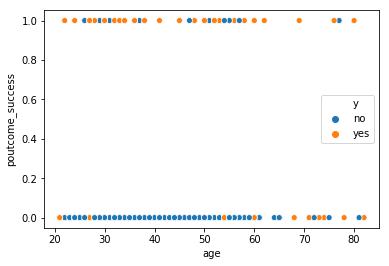

In [87]:
ax = sns.scatterplot(x="age", y="poutcome_success", hue ="y", data=df_plot)

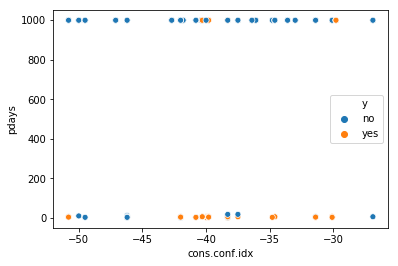

In [84]:
ax = sns.scatterplot(x="cons.conf.idx", y="pdays", hue ="y", data=df_plot)

### 5. Produce a table with the true/false positive/negative metrics as well as accuracies. Compare the values using bar charts [5]. HINT: classification report from sklearn.metrics

In [92]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test, y_pred_dt)
C

array([[983, 119],
       [ 98,  36]])

### Thus in binary classification, the count of true negatives is C(0,0) , false negatives is C(1, 0) , true positives is (1, 1) and false positives is C(0, 1).

In [91]:
true_negatives = C[0][0]
false_negetives = C[1][0]
true_positives = C[1][1]
false_positives = C[0][1]

983

In [98]:
print("******************Decision Tree Metrics*****************")
print(classification_report(y_test,y_pred_dt))

******************Decision Tree Mertics*****************
              precision    recall  f1-score   support

          no       0.91      0.89      0.90      1102
         yes       0.23      0.27      0.25       134

   micro avg       0.82      0.82      0.82      1236
   macro avg       0.57      0.58      0.57      1236
weighted avg       0.84      0.82      0.83      1236



In [113]:
print("******************Random Forest Metrics*****************")
print(classification_report(y_test,y_pred_rf))

******************Random Forest Metrics*****************
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      1102
         yes       0.52      0.19      0.27       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.71      0.58      0.61      1236
weighted avg       0.87      0.89      0.87      1236



In [114]:
print("******************Neural Network Metrics*****************")
print(classification_report(y_test,y_pred_nn))

******************Neural Network Metrics*****************
              precision    recall  f1-score   support

          no       0.89      1.00      0.94      1102
         yes       0.00      0.00      0.00       134

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.79      0.89      0.84      1236



/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [108]:
from sklearn.metrics import precision_recall_fscore_support as score
import numpy as np
metrics = []
metrics.append(score(y_test, y_pred_dt, average='weighted'))
metrics.append(score(y_test, y_pred_rf, average='weighted'))
metrics.append(score(y_test, y_pred_nn, average='weighted'))
metrics_df = pd.DataFrame(metrics)
metrics_df.drop(columns = [3], inplace = True)
metrics_df.columns = ['precision','recall','f1score',]
metrics_df['algorithm'] = np.array(['DT', 'RF', 'NN'])
metrics_df.head()

,precision,recall,f1score,algorithm
0,0.835938,0.824434,0.829968,DT
1,0.866248,0.893204,0.869977,RF
2,0.794925,0.891586,0.840485,NN


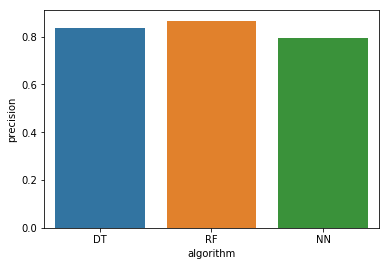

In [110]:
ax = sns.barplot(x="algorithm", y="precision", data=metrics_df)

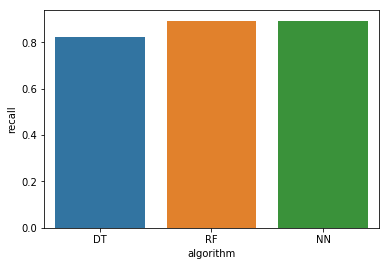

In [111]:
ax = sns.barplot(x="algorithm", y="recall", data=metrics_df)

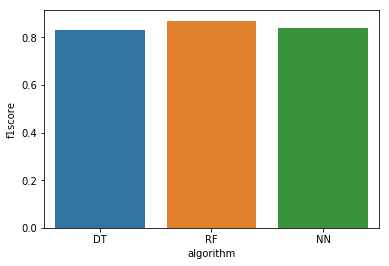

In [112]:
ax = sns.barplot(x="algorithm", y="f1score", data=metrics_df)

### 7. For Fun/Bonus: attempt at least one method to tackle the discrepancy in the size of the classes (imbalanced data) [+5].

In [117]:
bank_data['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [152]:
!pip install imblearn 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import EasyEnsemble
ros = RandomOverSampler(random_state=42)
X_sampled, y_sampled = ros.fit_resample(X_train, y_train)

In [153]:
df = pd.DataFrame(y_sampled)
df.columns = ['y']
df['y'].value_counts()

no     2566
yes    2566
Name: y, dtype: int64

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_smote = RandomForestClassifier()
rf_clf_smote = rf_clf_smote.fit(X_sampled, y_sampled)
y_pred_smote = rf_clf_smote.predict(X_test)
print(classification_report(y_test,y_pred_smote))
print(accuracy_score(y_test,y_pred_smote))

              precision    recall  f1-score   support

          no       0.92      0.96      0.94      1102
         yes       0.44      0.28      0.34       134

   micro avg       0.88      0.88      0.88      1236
   macro avg       0.68      0.62      0.64      1236
weighted avg       0.86      0.88      0.87      1236

0.883495145631068


/home/acer/anaconda3/envs/DSDJ/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**References**

1. https://scikit-learn.org/stable/modules/tree.html#tree-algorithms